# Decentraland Hint
On 2020-02-20 we were given a hint in the form of a screenshot from within [decentraland](https://decentraland.org/)

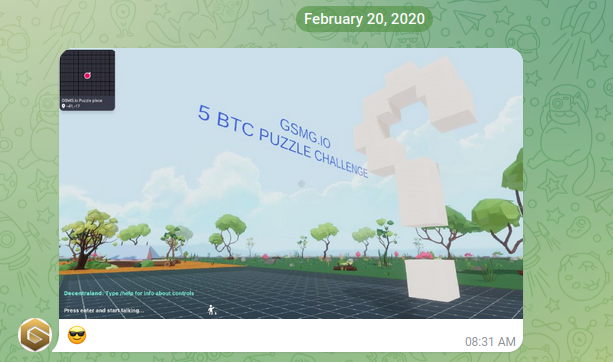

## Observations

* The screenshot is taken from the coordinates -41,17
* There's a big question mark there.

## Solving

Let's go exploring. 
1. First we go to decentraland, and click the "Start Exploring" button.
2. Next, lets explore on the web
3. We want to play as a guest because we're just exploring
4. Wait for the game to start.
5. Set up a character (or accept the default)
6. Create a name
7. Accept the ToS and privacy policy
8. Wait for it to load again
9. Click through the tutorial
10. Click on "Go to Genesis City" to load to coordinates 0,0
11. Hit "Enter"/"Return" on the keyboard to bring up the chat overlay
12. Type in "/goto -41,-17" and hit enter
13. Walk over to the bottom of the question mark
14. Interact with the bottom of the question mark, and you'll hear hissing/whitenoise. 

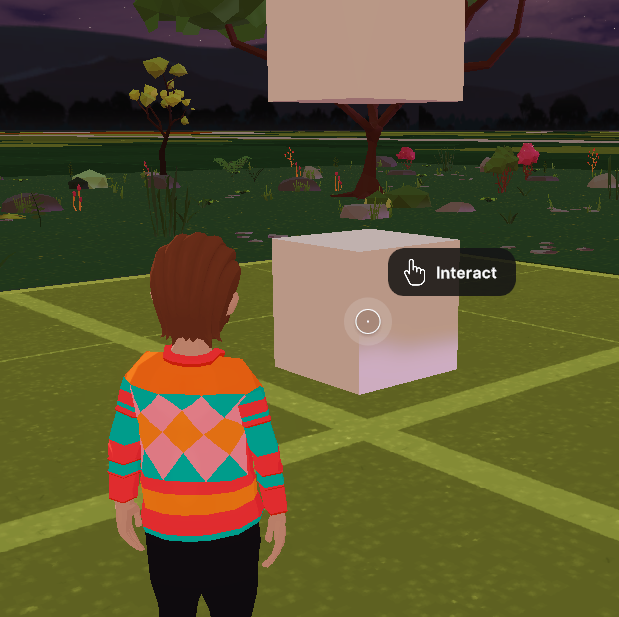

The sound is something we want to analyze. Decentraland has a javascript api that can be used.
1. Install it with `npm i decentraland`
2. Now we can run `dcl status -41,-17` to get information about the square
   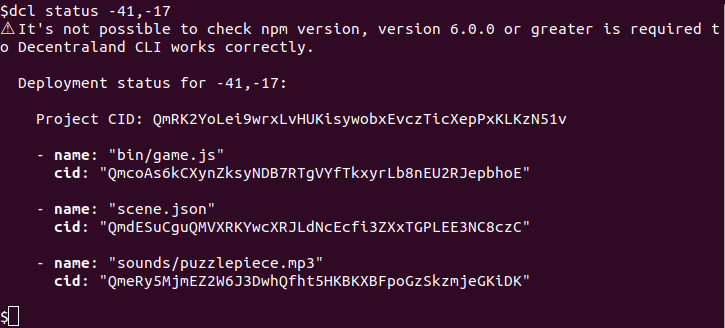
3. Next we see that there is a "puzzlepiece.mp3" file with the content id of `QmeRy5MjmEZ2W6J3DwhQfht5HKBKXBFpoGzSkzmjeGKiDK`
4. We can download that file using the [Content API](https://docs.decentraland.org/contributor/content/practice/cli/).
5. The full url will be `https://peer.decentraland.org/content/contents/` + the content ID so: `https://peer.decentraland.org/content/contents/QmeRy5MjmEZ2W6J3DwhQfht5HKBKXBFpoGzSkzmjeGKiDK`
6. Download the file using curl: `curl https://peer.decentraland.org/content/contents/QmeRy5MjmEZ2W6J3DwhQfht5HKBKXBFpoGzSkzmjeGKiDK > puzzlepiece.mp3`
7. Now we can start analyzing it.

In [40]:
import soundfile as sf

data, samplerate=sf.read('./decentraland-assets/puzzlepiece.mp3')
data

array([[0.00000000e+00, 0.00000000e+00],
       [8.65467698e-10, 8.65467698e-10],
       [3.56512286e-09, 3.56512286e-09],
       ...,
       [2.07189514e-04, 2.09438236e-04],
       [2.06885976e-04, 2.09130405e-04],
       [2.06581113e-04, 2.08820915e-04]])

It's quite [a common steganographic technique](https://en.wikipedia.org/wiki/Steganography#Hiding_an_image_within_a_soundfile) to hide text in audio, and can usually be found using a spectogram.

We can see from the data that there are two channels, left and right, 

In [41]:
left = data[...,0]
right = data[...,1]
left, right

(array([0.00000000e+00, 8.65467698e-10, 3.56512286e-09, ...,
        2.07189514e-04, 2.06885976e-04, 2.06581113e-04]),
 array([0.00000000e+00, 8.65467698e-10, 3.56512286e-09, ...,
        2.09438236e-04, 2.09130405e-04, 2.08820915e-04]))

The most common way to hide data in sound data is by hiding it in the spectogram and inverting one channel.

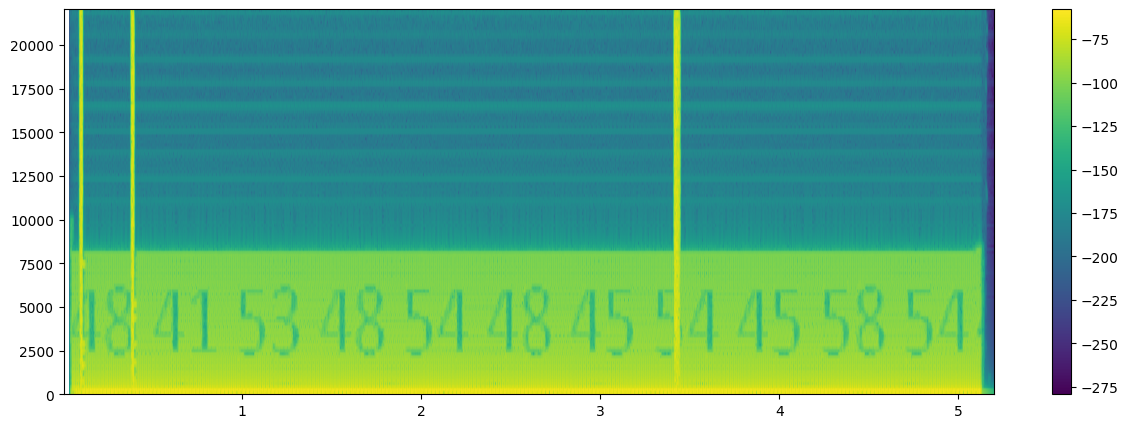

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

def invert_data(s):
    return np.array([
        (-1**i)*x for i,x in enumerate(s)
    ])
# Invert one channel
new_right = invert_data(right)
# and sum back up to mono
new_data=left+new_right

# Plot the spectogram
plt.figure(figsize=(15,5))
plt.specgram(new_data, Fs=samplerate)
plt.colorbar()
plt.show()

Here we see a list of numbers, all between 41 and 58. This just happens to be within the range of 'A' to 'Z' as ascii values in base 16.

In [44]:
print(hex(ord('A')), hex(ord('Z')))

0x41 0x5a


So now we can reverse the transform

In [47]:
numbers = ['48','41','53','48','54','48','45','54','45','58','54']

def to_letter(n):
    return chr(int(n, 16))

print(''.join(map(to_letter, numbers)))

HASHTHETEXT
